In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/Bioinformatics"
!ls

/content/drive/MyDrive/Colab Notebooks/Bioinformatics
AtomPairs2DFingerprintCount.xml
AtomPairs2DFingerprinter.xml
bioactivity_data_3class_pIC50.csv
bioactivity_data_3class_pIC50_pubchem_fp.csv
bioactivity_data.csv
bioactivity_preprocessed_data.csv
CDD_ML_Part_1_bioactivity_data.ipynb
CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb
CDD_ML_Part_3_Descriptor_Dataset_Preparation.ipynb
CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb
descriptors_output.csv
EStateFingerprinter.xml
ExtendedFingerprinter.xml
Fingerprinter.xml
fingerprints_xml.zip
GraphOnlyFingerprinter.xml
KlekotaRothFingerprintCount.xml
KlekotaRothFingerprinter.xml
MACCSFingerprinter.xml
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
Miniconda3-py37_4.8.2-Linux-x86_64.sh
molecules.smi
plot_bioactivity_class.pdf
plot_ic50.pdf
plot_LogP.pdf
plot_MW.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plot_NumHDonors.pdf
PubchemFingerprinter.x

## **1. Import libraries**

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [4]:
df = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
255,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
256,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
257,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

,pIC50
0,5.142668
1,5.026872
2,4.869666
3,4.882397
4,5.698970
...,...
254,7.283997
255,7.522879
256,7.853872
257,7.318759


### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(259, 881)

In [8]:
Y.shape

(259,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(259, 185)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((207, 185), (207,))

In [13]:
X_test.shape, Y_test.shape

((52, 185), (52,))

## **5. Building a Regression Model using Random Forest**

In [17]:
import numpy as np
np.random.seed(42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5195160442634583

In [18]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

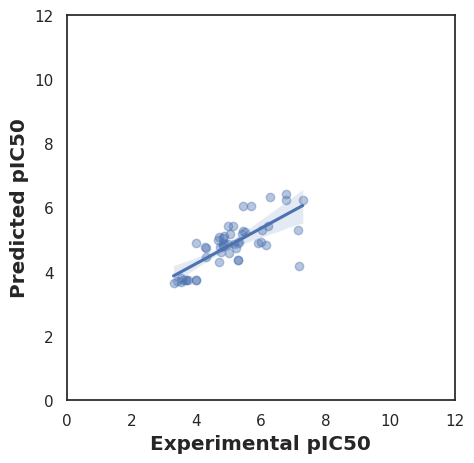

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show